In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# For model improvement
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

# For Deep Learning
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay

## Data Collection and Processing

In [2]:
# loading data into pandas data frame

heart_data_1 = pd.read_csv("heart_dataset_RafaelGranza_1026.csv")
heart_data_1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart_data_2 = pd.read_csv("heart_dataset_bharath0609_304.csv")
heart_data_2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
heart_data_3 = pd.read_csv("heart_dataset_jocelyndumlao_1000.csv")
heart_data_3.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,53,1,2,171,0,0,1,147,0,5.3,3,2,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,0,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,1,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,3,2,1
5,24,1,1,173,0,0,0,161,0,4.7,3,0,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2,3,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,1,0,0
8,62,1,0,121,357,0,1,138,0,2.8,0,0,0,0
9,61,0,0,190,181,0,1,150,0,2.9,2,2,0,1


In [5]:
heart_data_4 = pd.read_csv("heart_dataset_rishidamarla_271.csv")
heart_data_4.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
heart_data_1.shape

(1025, 14)

In [7]:
heart_data_2.shape

(303, 14)

In [8]:
heart_data_3.shape

(1000, 14)

In [9]:
heart_data_4.shape

(1025, 14)

In [10]:
heart_data = pd.concat([heart_data_1, heart_data_2, heart_data_3, heart_data_4])
heart_data.shape

(3353, 14)

In [11]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
heart_data.shape

(3353, 14)

In [13]:
#columns names

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
# describing data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000,3353.000000
mean,52.879511,0.715180,0.955860,137.617954,265.542797,0.192962,0.594691,148.077542,0.383835,1.556606,1.432747,0.751566,1.994333,0.535938
std,12.588106,0.451396,1.007352,23.825499,89.398030,0.394682,0.617994,26.868658,0.486391,1.552707,0.756650,1.029698,0.898635,0.498781
min,20.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,131.000000,0.000000,0.100000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,132.000000,250.000000,0.000000,1.000000,151.000000,0.000000,1.200000,1.000000,0.000000,2.000000,1.000000
75%,62.000000,1.000000,2.000000,150.000000,303.000000,0.000000,1.000000,168.000000,1.000000,2.400000,2.000000,1.000000,3.000000,1.000000
max,80.000000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,1.000000


In [15]:
# dataset information

heart_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3353 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3353 non-null   int64  
 1   sex       3353 non-null   int64  
 2   cp        3353 non-null   int64  
 3   trestbps  3353 non-null   int64  
 4   chol      3353 non-null   int64  
 5   fbs       3353 non-null   int64  
 6   restecg   3353 non-null   int64  
 7   thalach   3353 non-null   int64  
 8   exang     3353 non-null   int64  
 9   oldpeak   3353 non-null   float64
 10  slope     3353 non-null   int64  
 11  ca        3353 non-null   int64  
 12  thal      3353 non-null   int64  
 13  target    3353 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 392.9 KB


In [16]:
# checking for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
heart_data.dropna(subset=['target'], inplace=True)
heart_data.shape

(3353, 14)

In [18]:
# checking the distribution of target variable

heart_data['target'].value_counts()

target
1    1797
0    1556
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='target', ylabel='count'>

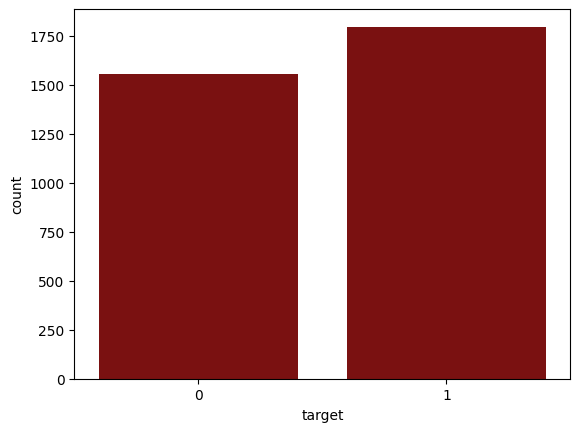

In [19]:
sns.countplot(x='target', data = heart_data, color = 'darkred')

# distribution of target

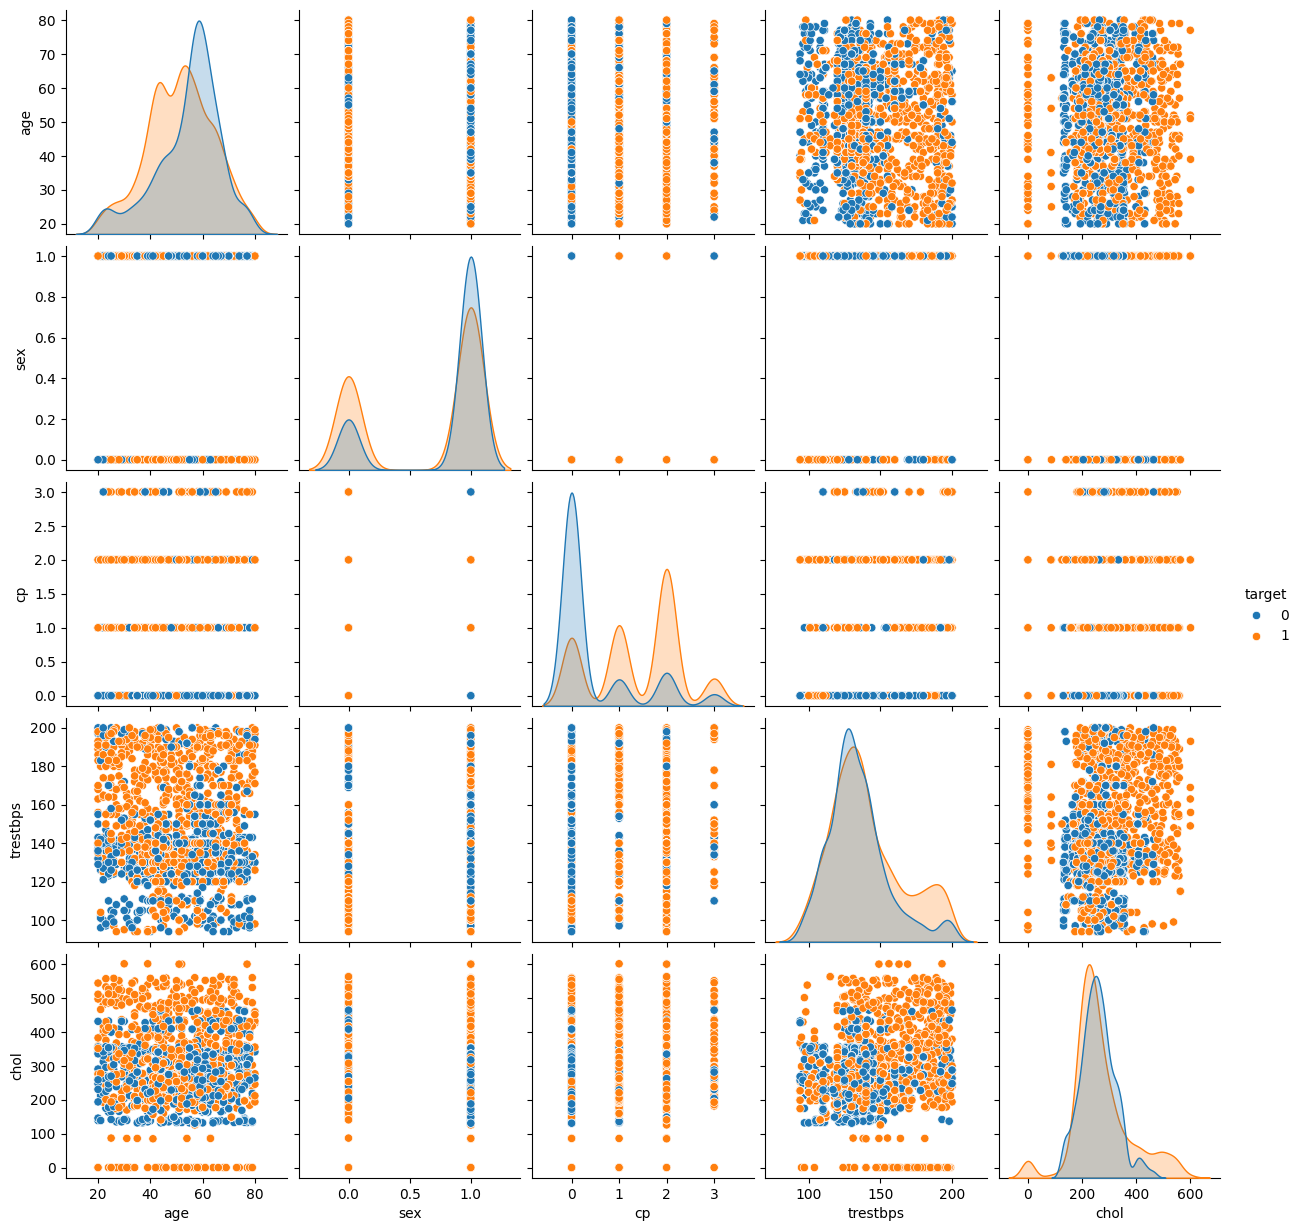

In [20]:
sns.pairplot(heart_data, hue= 'target',vars = ['age', 'sex', 'cp', 'trestbps', 'chol' ])

# pair plot in dataset of outcome with all columns

<Axes: >

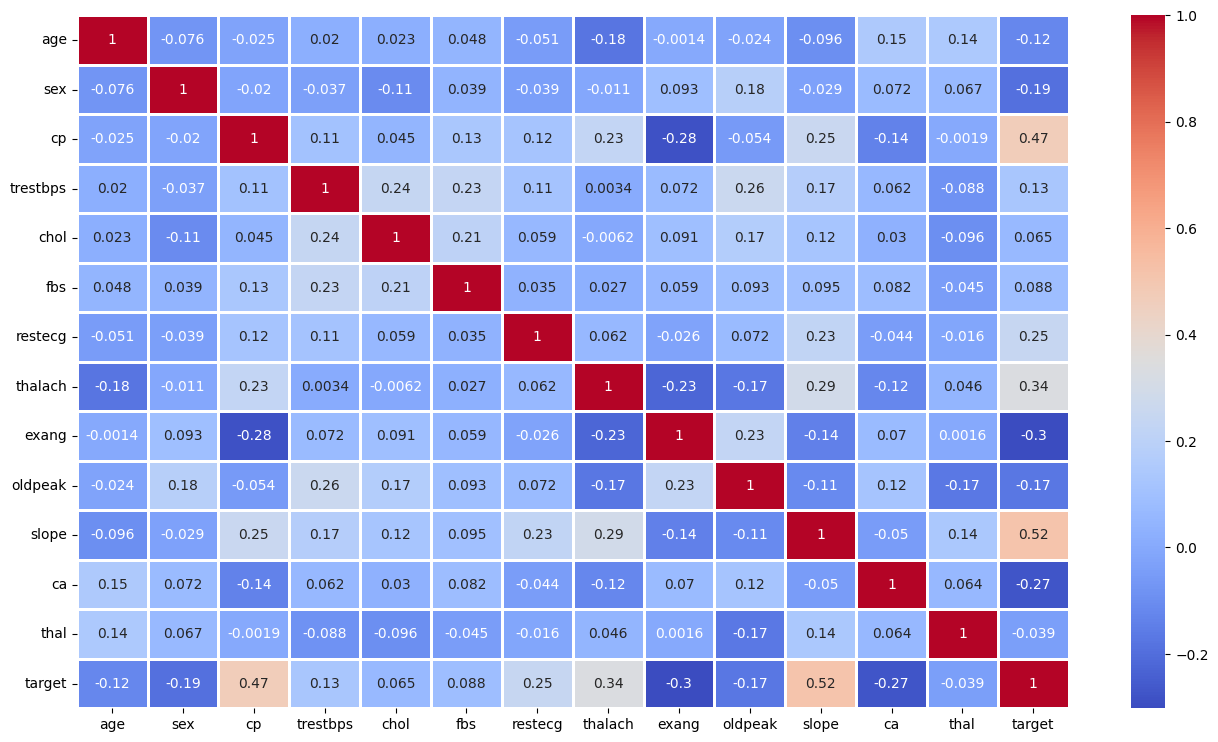

In [21]:
#create correlation chart for all columns

plt.figure(figsize= (16,9))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm', linewidths = 2)

Here, We have approx equal distribution of data.

### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


## Splitting the Features and Target

In [22]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [23]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Data Standardization

In [24]:
# Min-Max scaling Implementation in python
scaler = MinMaxScaler()
scaler.fit(X)
X_standard= scaler.transform(X)

## Splitting the Data into Training data and Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size = 0.25, stratify = Y, random_state = 42 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 15 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness

In [26]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(3353, 13) (2514, 13) (839, 13)


In [27]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(Y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(Y_test))

X_train: (2514, 13)
y_train: (2514,)
X_test: (839, 13)
y_test: (839,)


## Model Training


### 1. Logistic Regression



In [28]:
# instantiate the model
lr = LogisticRegression()

# training the LogisticRegression model with training data
lr.fit(X_train, Y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))


Model accuracy score: 0.8522
Model Precision score: 0.8606


### 2. Naive Bayes Classifier

In [30]:
# instantiate the model
gnb = GaussianNB()
# model = gnb

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [31]:
y_pred = gnb.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))


Model accuracy score: 0.8462
Model Precision score: 0.8512


### 3. K-Nearest Neighbor (KNN)

In [32]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=7)


# fit the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred = knn.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))

Model accuracy score: 0.9487
Model Precision score: 0.9744


### 4. Decision Tree Classifier

In [34]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()


# fit the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [35]:
y_pred = dtc.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))



Model accuracy score: 0.9869
Model Precision score: 0.9889


### 5. Support Vector Machine (Linear)

In [36]:
# instantiate the model
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [37]:
y_pred = svm.predict(X_test)

y_pred
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model Precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))

Model accuracy score: 0.8474
Model Precision score: 0.8546


## Multi-model training

In [38]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0) # A higher gamma value means that each training example will have a greater influence on the decision boundary.
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1') # liblinear is parameter specifies the solver to use,
# L1 penalty is a type of regularization that helps to prevent overfitting.

rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)  # n_estimators : the number of trees in the forest,
# random_state : specifies the random seed that is used to initialize the random forest

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

#Deep Learning


In [39]:
# define the keras model

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(13,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
# compile the keras model

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [41]:
model.fit(X_train, Y_train, epochs=150, batch_size = 50)

Epoch 1/150
51/51 [==============================] - 1s 2ms/step - loss: 0.6680 - accuracy: 0.6321
Epoch 2/150
51/51 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7458
Epoch 3/150
51/51 [==============================] - 0s 2ms/step - loss: 0.5389 - accuracy: 0.7852
Epoch 4/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8091
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8162
Epoch 6/150
51/51 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8238
Epoch 7/150
51/51 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8278
Epoch 8/150
51/51 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8290
Epoch 9/150
51/51 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8317
Epoch 10/150
51/51 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8325
Epoch 11/

# Accuracy metrices

In [42]:
predicted = model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


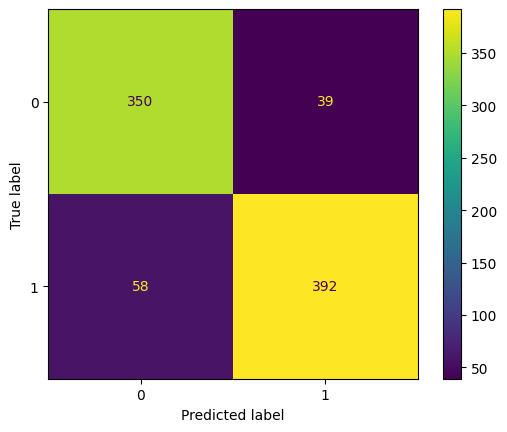

In [43]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(Y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [44]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

27/27 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8844
[0.289162814617157, 0.8843861818313599]
Loss =  0.289162814617157
Accuracy =  0.8843861818313599


In [45]:
dl_accuracy_score=accuracy_score(Y_test,predicted)
dl_precision_score= precision_score(Y_test, predicted)
print('Model Accuracy score: ',dl_accuracy_score)
print('Model Precision score: ',dl_precision_score)

Model Accuracy score:  0.8843861740166865
Model Precision score:  0.9095127610208816


In [46]:
# check results
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       389
           1       0.91      0.87      0.89       450

    accuracy                           0.88       839
   macro avg       0.88      0.89      0.88       839
weighted avg       0.89      0.88      0.88       839



#Comparing Accuracy and precision of all Model

In [47]:
classification = {
    'Support Vector Classifier' : svc,
    'K-Neighbors Classifier'  : knc,
    'Multinomial NB'  : mnb,
    'Decision Tree Classifier'  : dtc,
    'Logistic Regression'  : lrc,
    'Random Forest Classifier'  : rfc,
    'AdaBoost Classifier': abc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boosting Classifier' : gbdt,
    'XGB Classifier' : xgb
}

In [48]:
def train_classifier(classification, X_train, y_train, X_test, y_test):
  classification.fit(X_train, y_train)
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  return accuracy, precision, matrix

In [49]:
accuracy_scores = []
precision_scores = []

for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix = train_classifier(cls, X_train, Y_train, X_test, Y_test)
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : \n", matrix, '\n')

  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

Model name :  Support Vector Classifier
Accuracy :  0.5518474374255066
Precision :  0.5848623853211009
Confusin-Matrix : 
 [[208 181]
 [195 255]] 

Model name :  K-Neighbors Classifier
Accuracy :  0.9690107270560191
Precision :  0.9711111111111111
Confusin-Matrix : 
 [[376  13]
 [ 13 437]] 

Model name :  Multinomial NB
Accuracy :  0.8009535160905841
Precision :  0.7747572815533981
Confusin-Matrix : 
 [[273 116]
 [ 51 399]] 

Model name :  Decision Tree Classifier
Accuracy :  0.8986889153754469
Precision :  0.9314420803782506
Confusin-Matrix : 
 [[360  29]
 [ 56 394]] 

Model name :  Logistic Regression
Accuracy :  0.8498212157330155
Precision :  0.86
Confusin-Matrix : 
 [[326  63]
 [ 63 387]] 

Model name :  Random Forest Classifier
Accuracy :  0.9964243146603099
Precision :  0.9955654101995566
Confusin-Matrix : 
 [[387   2]
 [  1 449]] 

Model name :  AdaBoost Classifier
Accuracy :  0.8939213349225268
Precision :  0.9149425287356322
Confusin-Matrix : 
 [[352  37]
 [ 52 398]] 

Model 

In [50]:
# creating dataframe containing
result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 'Precision' : precision_scores})

# adding dl accuracy and precision
df = {'Algorithm': 'Sequential Deep Learning', 'Accuracy': dl_accuracy_score, 'Precision': dl_precision_score}
result_dataframe = result_dataframe._append(df, ignore_index = True).sort_values('Precision', ascending = False)


In [51]:
result_dataframe

,Algorithm,Accuracy,Precision
10,XGB Classifier,0.998808,0.997783
8,Extra Trees Classifier,0.997616,0.995575
5,Random Forest Classifier,0.996424,0.995565
7,Bagging Classifier,0.992849,0.993333
1,K-Neighbors Classifier,0.969011,0.971111
9,Gradient Boosting Classifier,0.926103,0.940909
3,Decision Tree Classifier,0.898689,0.931442
6,AdaBoost Classifier,0.893921,0.914943
11,Sequential Deep Learning,0.884386,0.909513
4,Logistic Regression,0.849821,0.860000


## Model Improvement

In [52]:
# voting classifier :  ensemble learning method that combines the predictions of several different machine learning models to produce a final prediction.
# The models that are combined can be of different types, such as decision trees, support vector machines, or random forests.

xgb = XGBClassifier(n_estimators = 50, random_state=42)
bc = BaggingClassifier(n_estimators = 50, random_state = 42)
rfc = RandomForestClassifier(n_estimators= 50, random_state = 42)
etc = ExtraTreesClassifier(n_estimators = 50, random_state =42)

In [53]:
voting = VotingClassifier(estimators=[('xgb', xgb), ('bc', bc), ('rfc', rfc),  ('et', etc) ],voting='soft')

In [54]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('bc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=42)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42))],
                 voting='soft')

In [55]:
# comparision between voting classifiers and XGBClassifier

xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)

print('xgb Classifier :')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))
print('Model confusion_matrix: \n', (confusion_matrix(Y_test, y_pred)))

# print(accuracy_score(Y_test, y_pred))
# print(confusion_matrix(Y_test, y_pred))
# print(precision_score(Y_test, y_pred))

# voting model is most accurate and precise

voting.fit(X_train, Y_train)
y_pred = voting.predict(X_test)

# print(accuracy_score(Y_test, y_pred))
# print(confusion_matrix(Y_test, y_pred))
# print(precision_score(Y_test, y_pred))


print('Voting Classifier : ')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
print('Model precision score: {0:0.4f}'. format(precision_score(Y_test, y_pred)))
print('Model confusion_matrix: \n', (confusion_matrix(Y_test, y_pred)))

xgb Classifier :
Model accuracy score: 0.9988
Model precision score: 0.9978
Model confusion_matrix: 
 [[388   1]
 [  0 450]]
Voting Classifier : 
Model accuracy score: 0.9976
Model precision score: 0.9956
Model confusion_matrix: 
 [[387   2]
 [  0 450]]


## Model Evaluation

- Accuracy score
  - 1. For training data
  - 2. For testing data

  accuracy score for both should be closer to 1

- Other Metrices:
  - 1. Accuracy
  - 2. Precision
  - 3. Recall
  - 4. F1 Score

- Confusion Metrix
  

In [56]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns
rfc.fit(X_train,Y_train)
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  1.0


In [57]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_test_prediction = rfc.predict(X_test)
training_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  0.9976162097735399


In [58]:
# Accuracy, F1, Recall, Precision

Y_pred = rfc.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision  :", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall     :", recall)
F1_score = f1_score(Y_test, Y_pred)
print("F1-score   :", F1_score)

Accuracy   : 0.9976162097735399
Precision  : 0.995575221238938
Recall     : 1.0
F1-score   : 0.9977827050997783


In [59]:
# check results
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       389
           1       1.00      1.00      1.00       450

    accuracy                           1.00       839
   macro avg       1.00      1.00      1.00       839
weighted avg       1.00      1.00      1.00       839



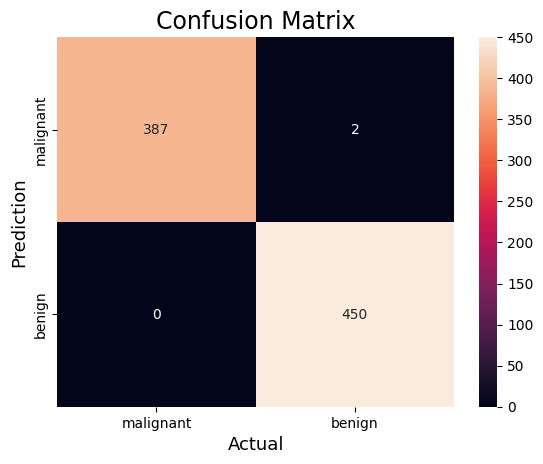

In [60]:
# confusion matrix

cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Building Prediction system

#### Steps :

  - take input data
  - Process the data, change into array
  - reshape data as single element in array
  - predict output using predict function
  - output the value

In [61]:
# input feature values
input_data = (58,0,3,150,283,1,0,162,0,1,2,0,2)

# changing data to numpy array
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)
print(input_data)
print(input_data_array)
print(input_data_reshaped)

# standarize the input data
# std_data = scaler.transform(input_data_reshaped)
# print(std_data[0])


(58, 0, 3, 150, 283, 1, 0, 162, 0, 1, 2, 0, 2)
[ 58   0   3 150 283   1   0 162   0   1   2   0   2]
[[ 58   0   3 150 283   1   0 162   0   1   2   0   2]]


In [62]:
# predicting the result and printing it

prediction = rfc.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart 💛💛💛💛")

else:
    print("Patient has a heart Disease 💔💔💔💔")

[1]
Patient has a heart Disease 💔💔💔💔


### Notations
  - [0] : means patient has a healthy heart 💛💛💛💛
  - [1] : means patient has a unhealthy heart 💔💔💔💔
  

## Saving the model

In [63]:
import pickle
# importing the library

filename = "trained_model.pkl"
pickle.dump(rfc, open(filename, 'wb'))
# saving file


In [64]:
# loading the saved model

loaded_model = pickle.load(open("trained_model.pkl",'rb'))

In [65]:
# save the model to disk
filename = 'heart_model.sav'
joblib.dump(rfc, filename)

['heart_model.sav']